# Calculate Energy of Colloidal Ice Simulation

This notebook introduces the calculation of the energy of the Colloidal Ice, which can be used to observe the evolution of the energetics of a Colloidal Ice system

In [1]:
import IceNumerics.Spins as Sp
import IceNumerics.ColloidalIce as Cp
import IceNumerics.Vertices as Vt
import IceNumerics.LAMMPSInterface as LMP

import copy as cp

import matplotlib.pyplot as plt

import numpy as np
import scipy.spatial as spa


%load_ext autoreload
%autoreload 2

%matplotlib inline

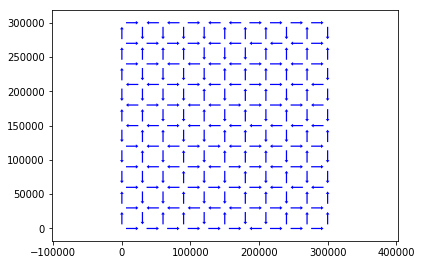

In [2]:
S = Sp.SquareSpinIce(10,10,Ratio = 1,Lattice = 30e3, Periodic = False, Ordering = "Random", Boundary = "ClosedSpin")
S.display()

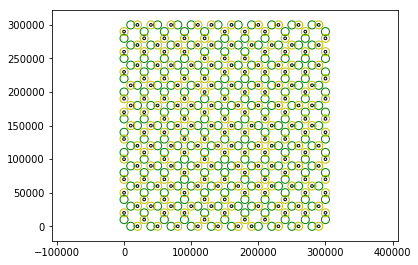

In [17]:
C = Cp.ColloidalIce(S,FieldZ=[30,1],Stiffness_Spread = 0,TrapSepRatio = 0.333333)
C.display()

In [4]:
C.CalculateEnergy()

9.8677296523033932e-11

In [18]:
Params = Sp.SimulationParameters(
    Runs=1,
    Thermo=1e2,
    Timestep= 1e-2,
    Framerate = 6e1,Time = 60,
    TargetDir = 'DocData/Honeycomb')
L = LMP.LAMMPSScript(C,Params,test=True)
L = L.LAMMPSRun()

In [19]:
DataFile = LMP.LazyOpenLAMMPSTrj(L.lammpstrj)

FrameData = DataFile.readframe(900.0);

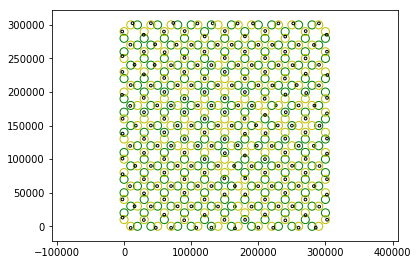

In [20]:
run = 0
C2 = C.FrameDataToColloids(FrameData,run);
C2.display()

First we extract all the timestep id of the frames stored in the output file

In [21]:
frames = np.sort(np.array(list(DataFile.T.keys())))

Now we calculate the energy for each frame

In [22]:
Energy = np.empty(np.shape(frames))

for i,frame in enumerate(frames):
    FrameData = DataFile.readframe(frame);
    C2 = cp.deepcopy(C.FrameDataToColloids(FrameData,run));
    Energy[i] = C2.CalculateEnergy()

(0, 500)

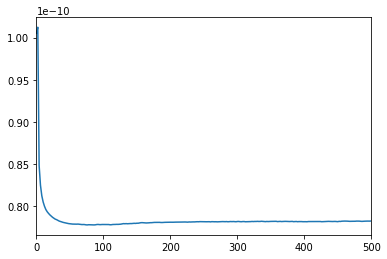

In [25]:
plt.plot(frames,Energy)
plt.xlim(0,500)

This are the initial and final states

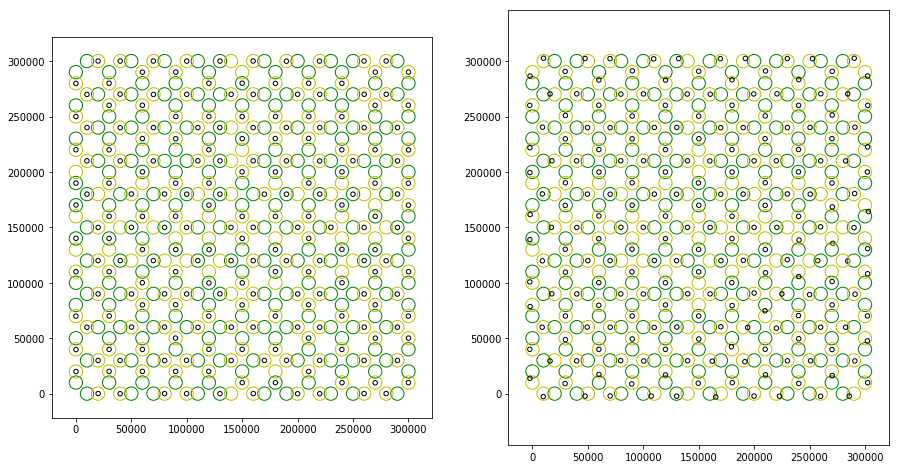

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

FrameData = DataFile.readframe(frames[1]);
C2 = C.FrameDataToColloids(FrameData,run);
C2.display(ax1)
ax1.set_aspect('equal')

FrameData = DataFile.readframe(frames[-1]);
C2 = C.FrameDataToColloids(FrameData,run);
C2.display(ax2)
ax2.set_aspect('equal')